# LSE Machine Learning: Practical Applications
## Module 3 Unit 2 IDE Activity (Assessment)
### In this IDE activity, you are required to follow the different steps introduced in the IDE practice activity to fit a regression model onto a suitable data set in R to calculate a prediction.
The instructions for this IDE activity are positioned throughout this notebook as text cells before each separate step. As a result, you are required to first read the text cells above a code cell, familiarise yourself with the required step, and execute the step. You are encouraged to refer back to the IDE activity (practice), specifically Video 1, to familiarise yourself with the way in which the regression model is fitted onto a data set in R.

### Step 1: Load the data

The first step is to load the relevant packages and the data into R. First, load the tidyverse package.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Once the package is loaded, load the Boston housing data set into R, and view the top rows using the `head` function.

In [2]:
data <- read_csv("BostonHousing.csv")
head(data)

Rows: 506 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, lstat...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


### Step 2: Visualise the data

Before fitting a regression model onto a data set, the data should be visualised to understand the underlying relationship between the variables. The data can often be skewed, which requires further transformations before proceeding.

To determine whether the predicted variable, in this case the median housing value (_**medv**_) variable, is normally distributed, generate a histogram for this variable.

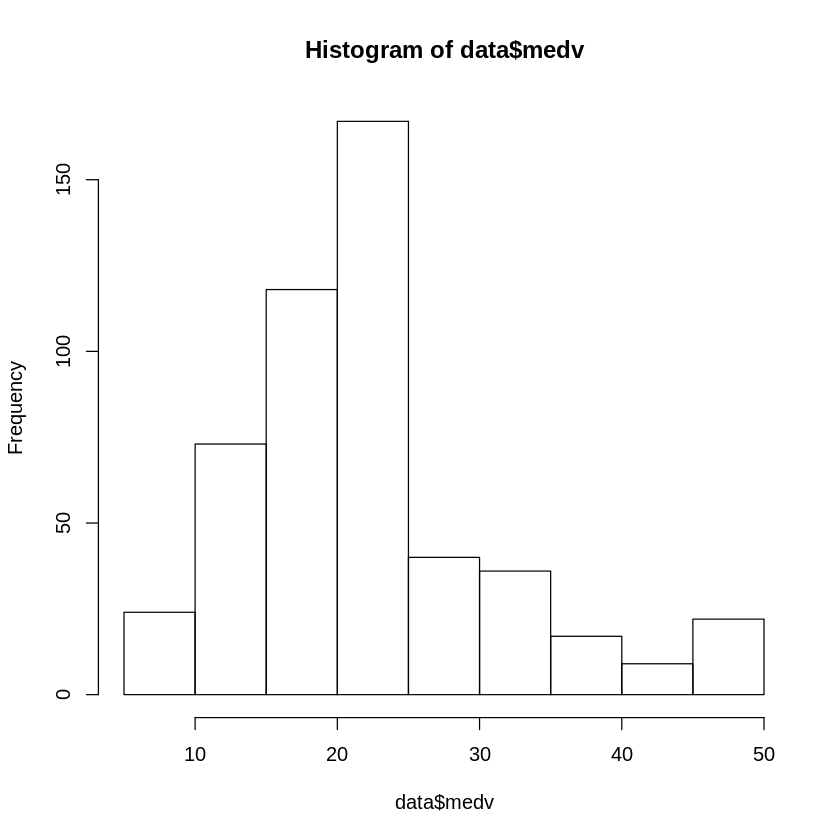

In [3]:
hist(data$medv)

From the histogram generated, it is clear that the _**medv**_ variable is normally distributed, as a bell curve is evident. Since the variable is already normally distributed, there is no need for further transformation. 

Proceed to create a summary of the data set.

In [4]:
summary(data)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

Note that the _**rad**_ and _**chas**_ variables are categorical variables, which must be converted into factors.

In [ ]:
data$rad <- as.factor(data$rad)
data$chas <- as.factor(data$chas)
data$rad
data$chas

#### Evaluate continuous variables
Next, you would typically use matrix scatterplots and correlation matrices to identify linear relationships.

Create scatterplots of the continuous variables against the _**medv**_ target variable.

**Hint:** To generate a scatterplot of crime rate per capita against median value, you would typically use the following command: 
`plot(data$crim, data$medv)`

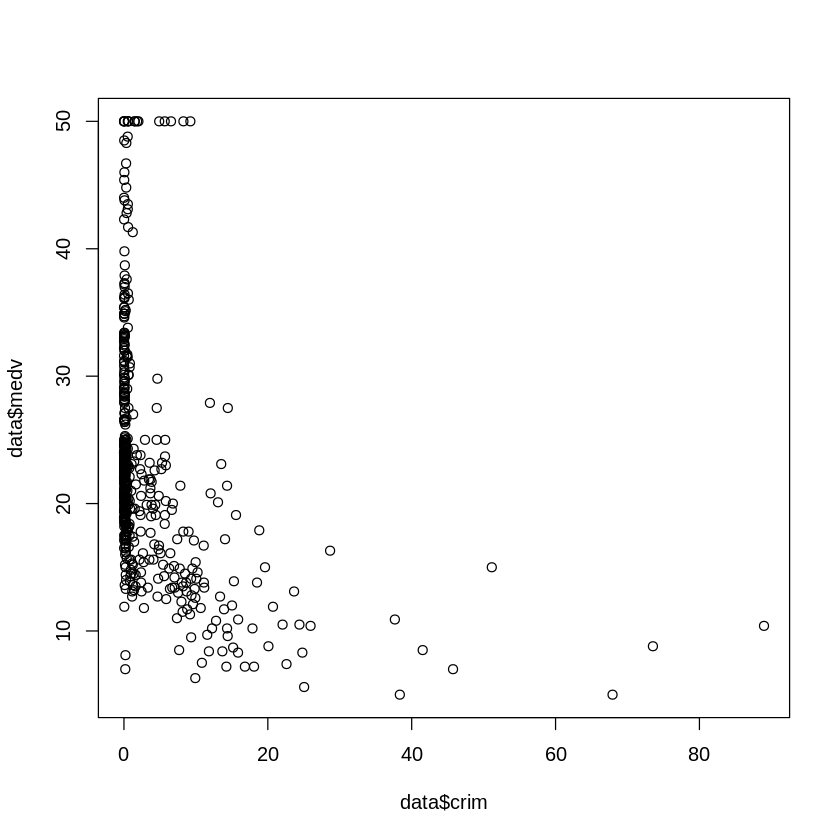

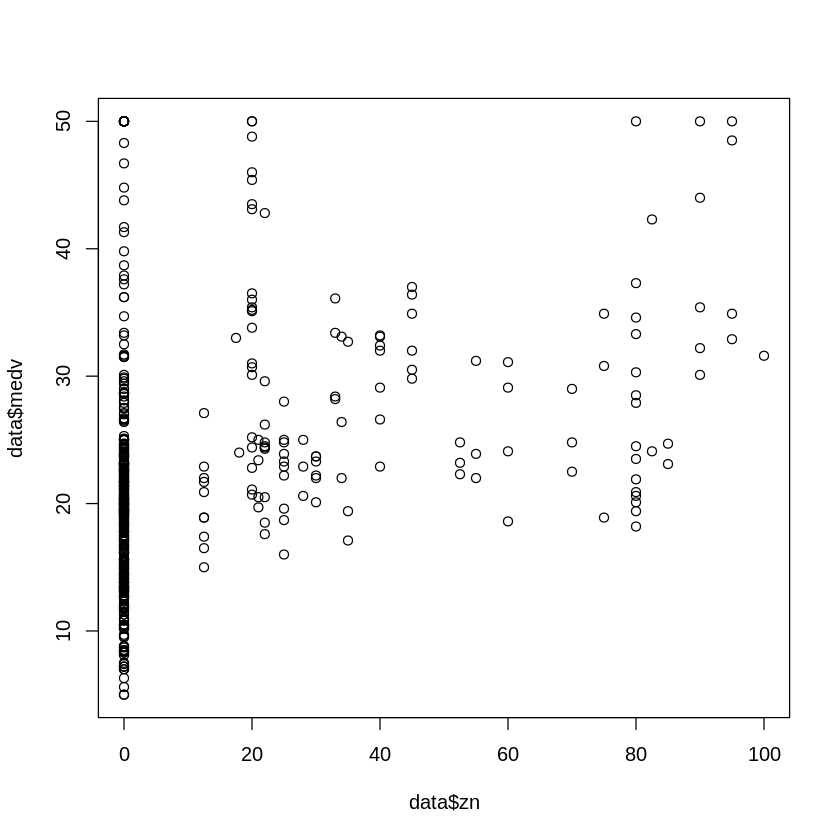

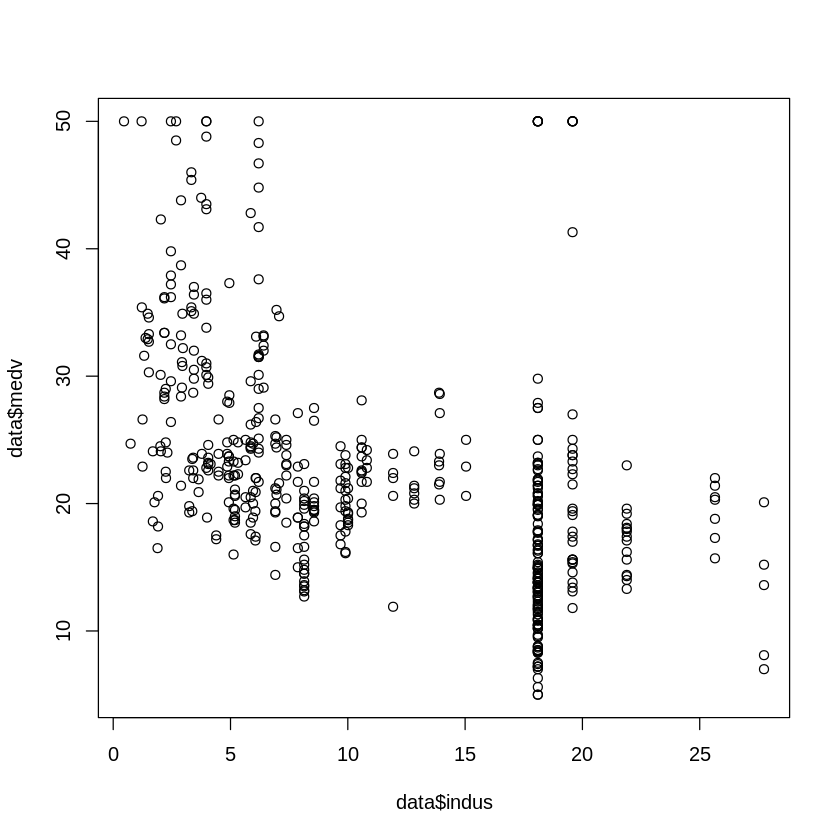

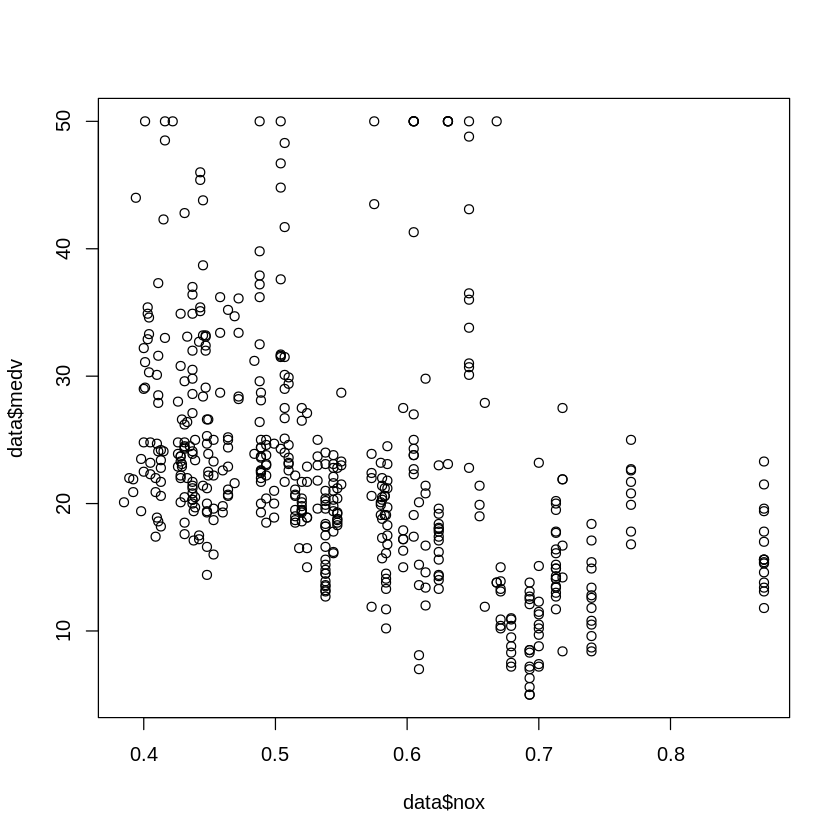

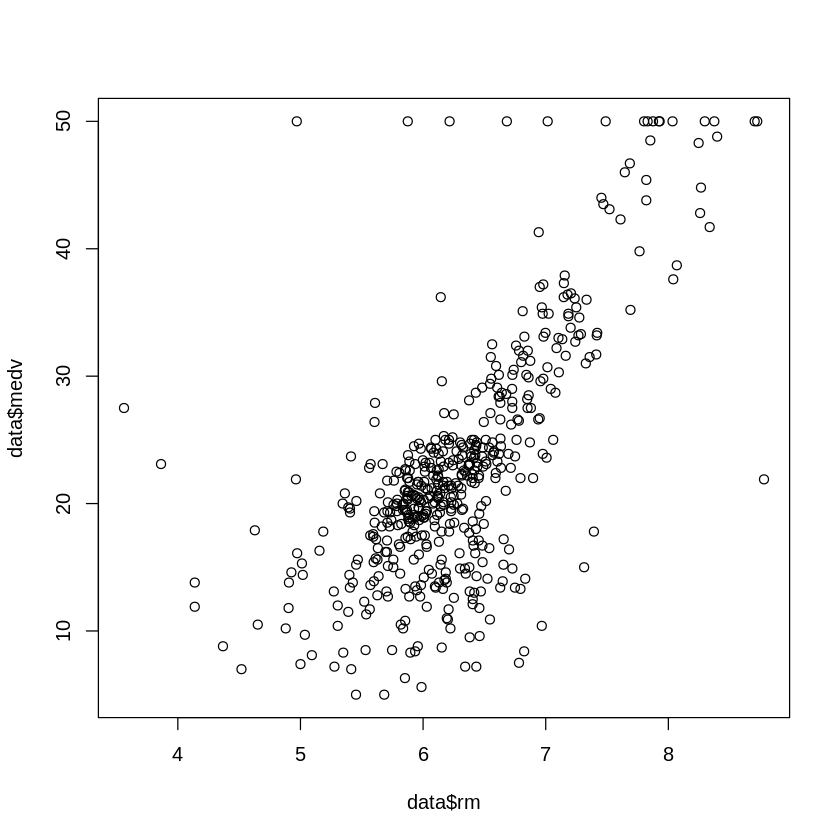

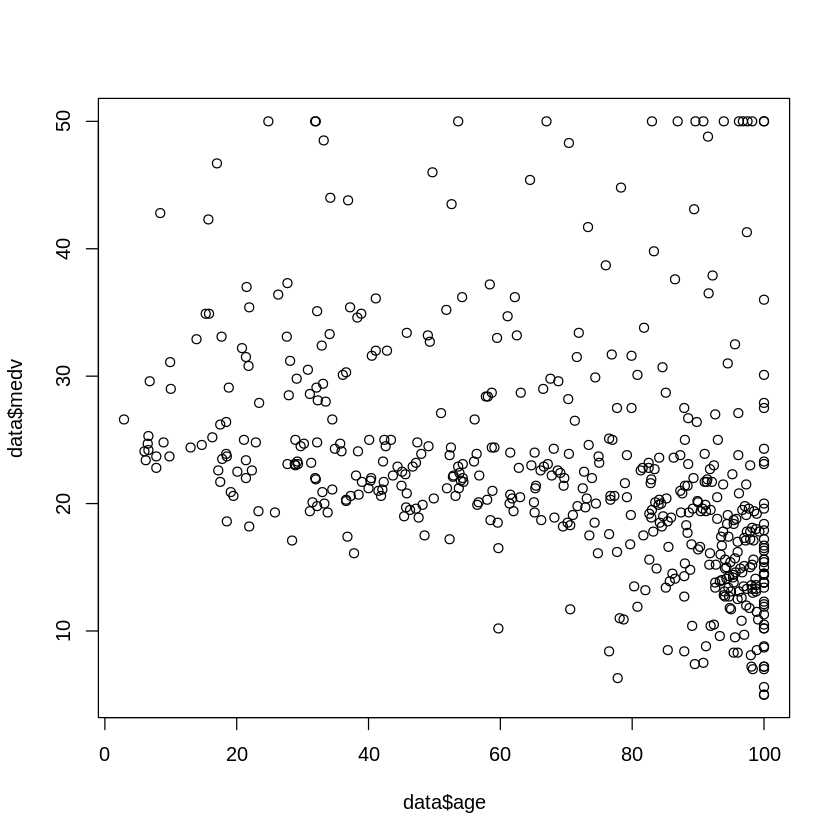

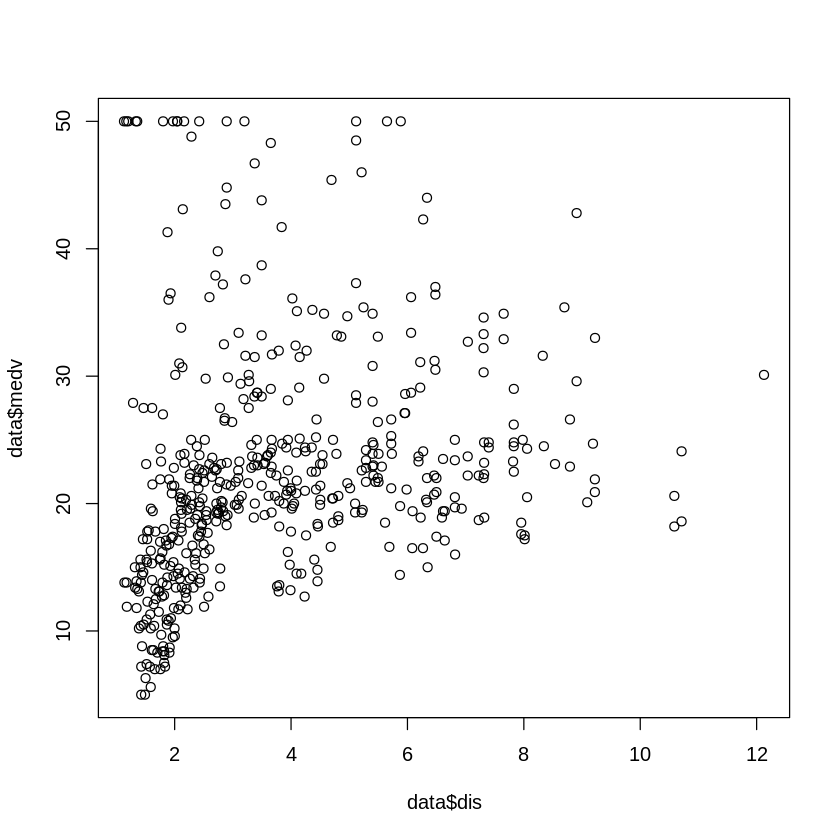

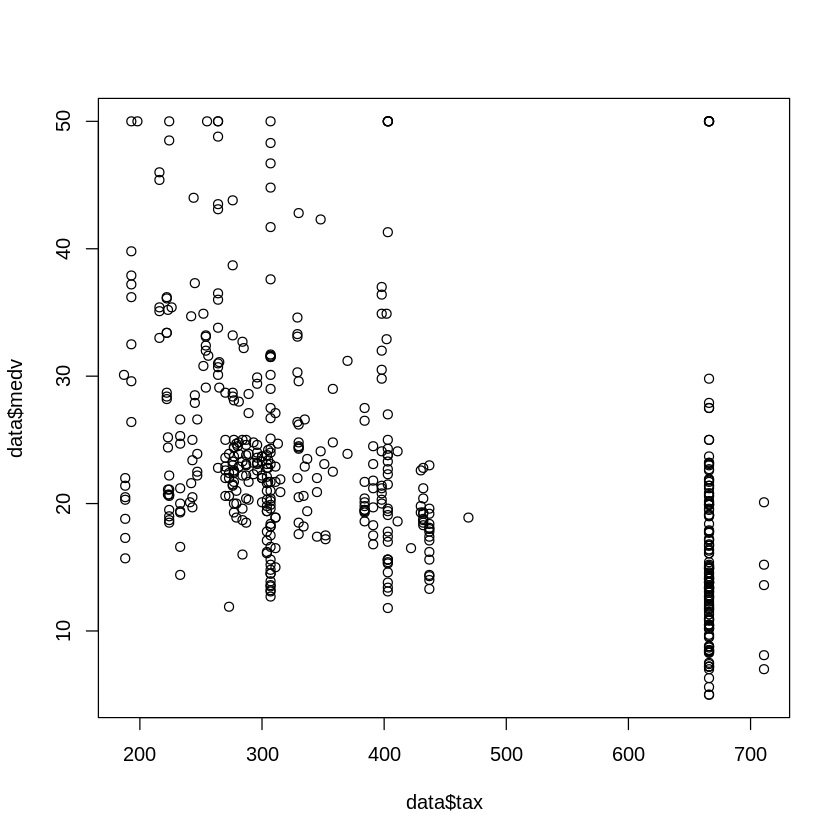

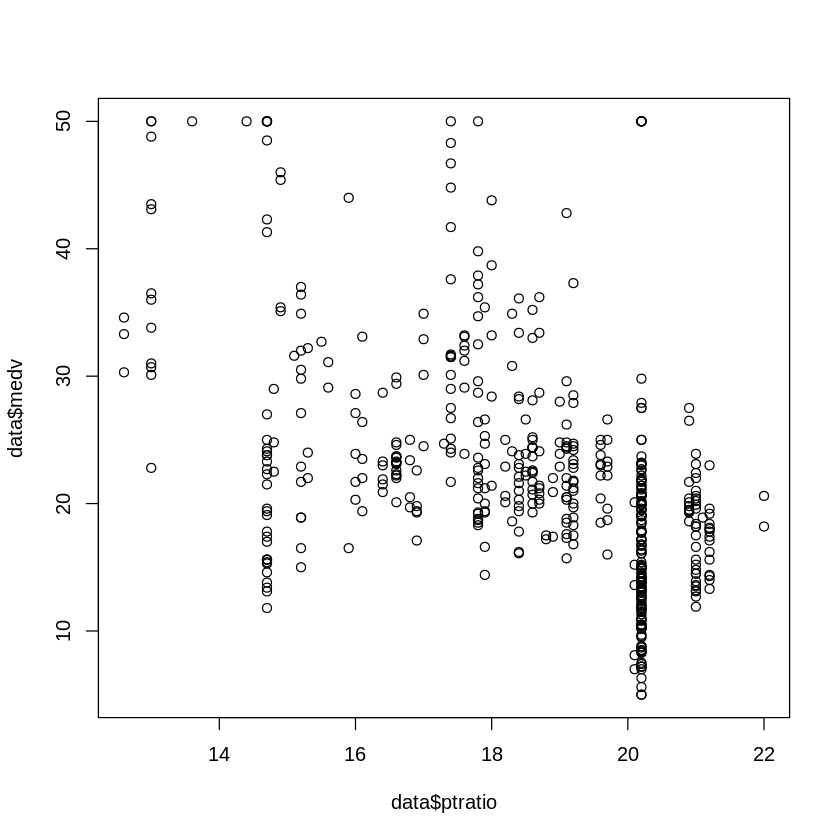

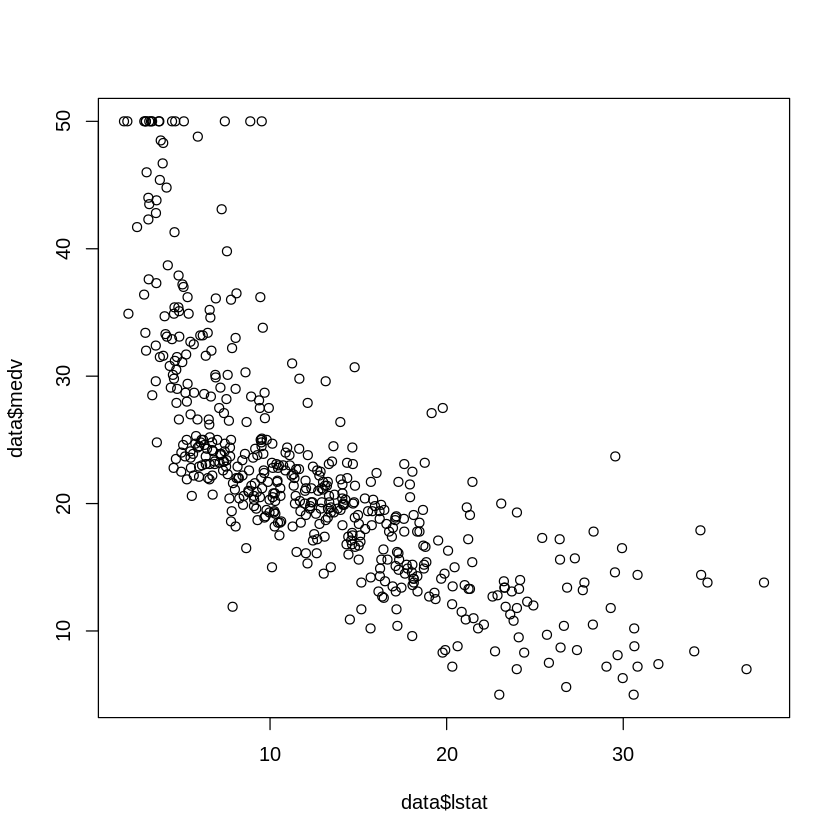

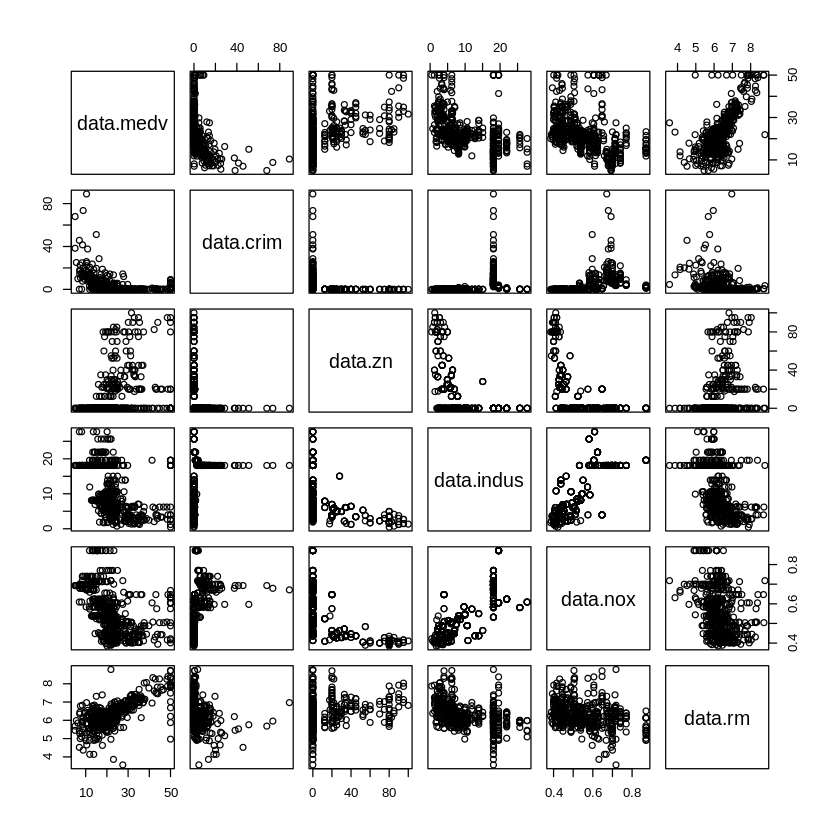

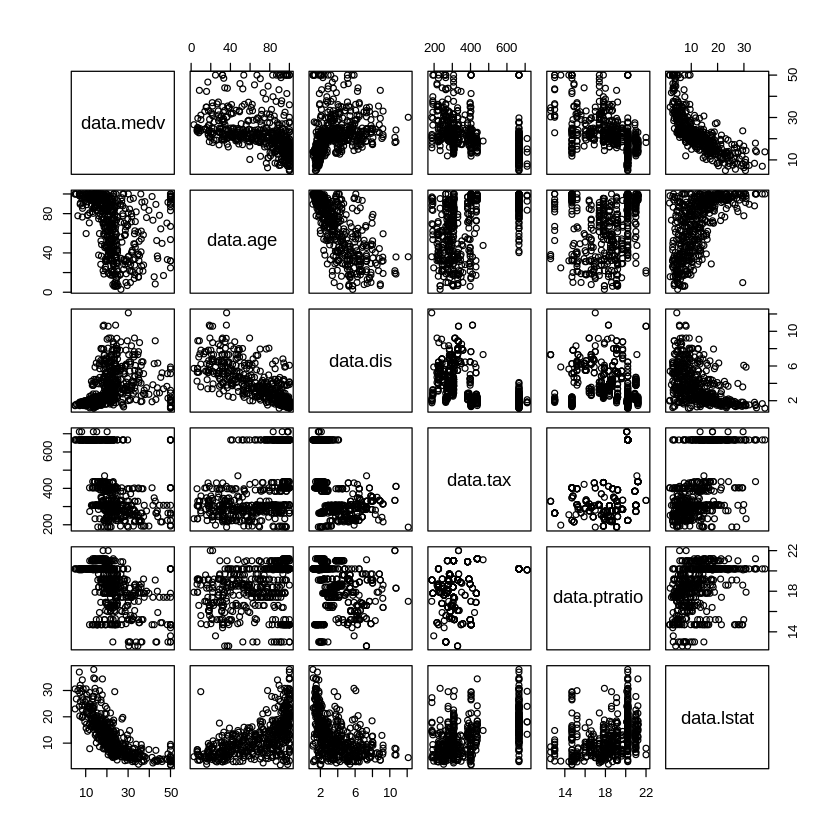

In [6]:
plot(data$crim, data$medv)
plot(data$zn, data$medv)
plot(data$indus, data$medv)
plot(data$nox, data$medv)
plot(data$rm, data$medv)
plot(data$age, data$medv)
plot(data$dis, data$medv)
plot(data$tax, data$medv)
plot(data$ptratio, data$medv)
plot(data$lstat, data$medv)


pairs(data.frame(data$medv, data$crim, data$zn, data$indus, data$nox, data$rm))
pairs(data.frame(data$medv, data$age, data$dis, data$tax, data$ptratio, data$lstat))

It appears that there are linear relationships between the _**medv**_ variable and all the other explanatory variables.

Now, create box plots between the _**medv**_ variable and the categorical variables, _**chas**_ and _**rad**_.

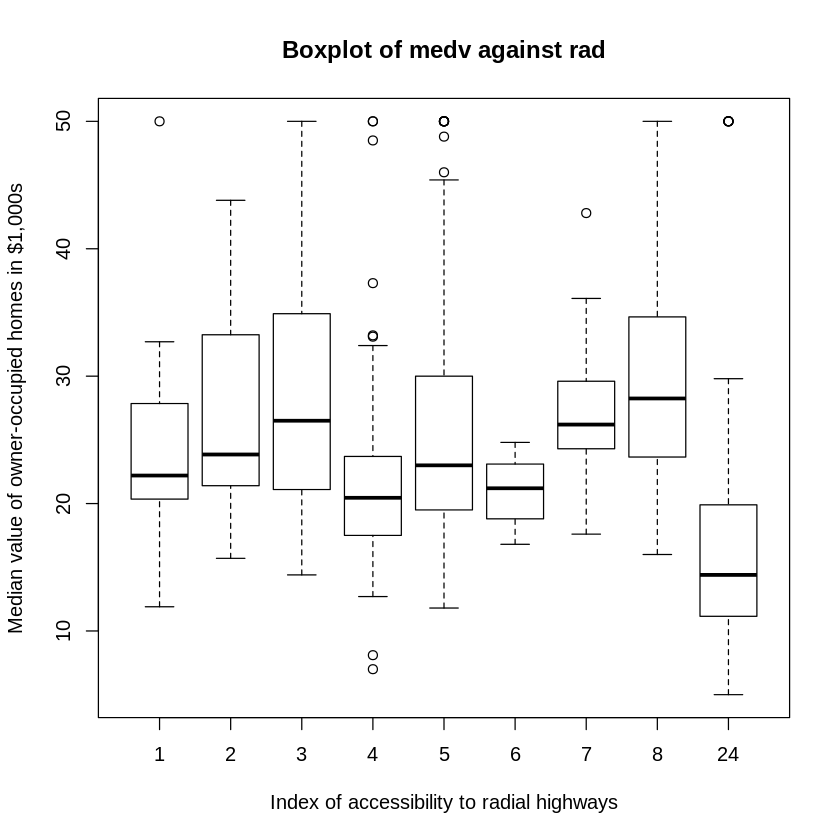

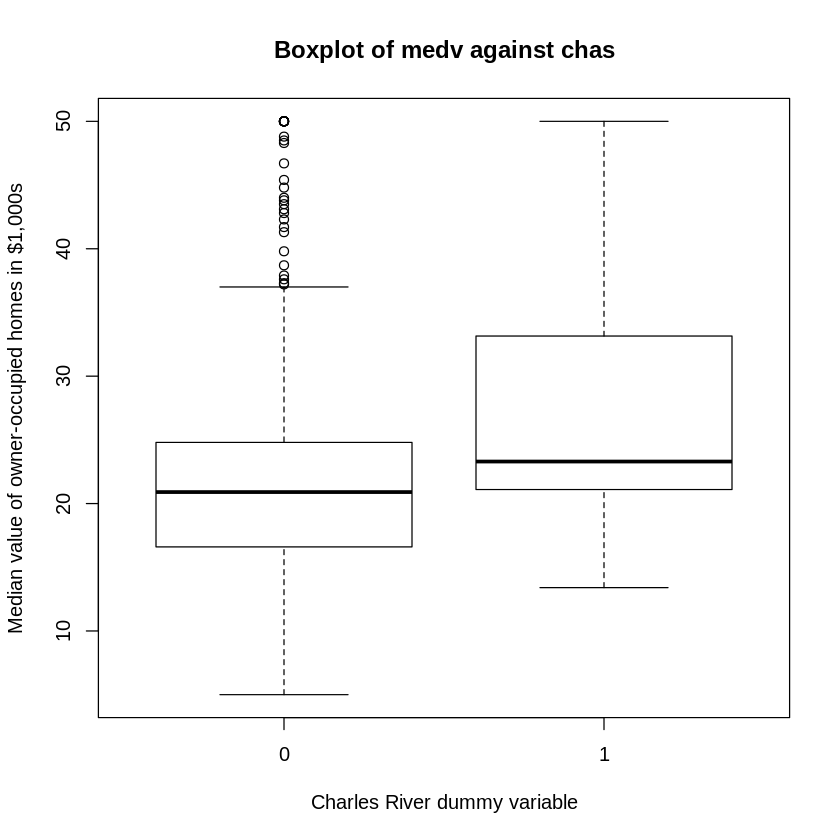

In [7]:

plot(data$rad,data$medv, main="Boxplot of medv against rad",
     xlab="Index of accessibility to radial highways",
     ylab="Median value of owner-occupied homes in $1,000s")

plot(data$chas,data$medv,main="Boxplot of medv against chas",
     xlab="Charles River dummy variable",
     ylab="Median value of owner-occupied homes in $1,000s")

The categorical variables also appear to have a relationship with the _**medv**_ variable.

Now that the relational values are known, create a regression model with _**medv**_ as the target variable and all other variables as explanatory variables.

> **Note:** You can include all other variables in the code by substituting in a `.` for them, instead of adding in the different variables.

Then, generate the summary statistics of the fitted regression model.

In [8]:
reg_model <- lm(medv~., data = data)

summary(reg_model)


Call:
lm(formula = medv ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6357  -2.7013  -0.5723   1.8160  25.9979 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.398739   5.296438   7.628 1.27e-13 ***
crim         -0.121816   0.032858  -3.707 0.000234 ***
zn            0.055525   0.014314   3.879 0.000119 ***
indus         0.016795   0.064363   0.261 0.794250    
chas1         2.677692   0.872194   3.070 0.002260 ** 
nox         -18.455862   3.933930  -4.691 3.53e-06 ***
rm            3.511231   0.423837   8.284 1.16e-15 ***
age           0.003511   0.013353   0.263 0.792741    
dis          -1.568899   0.204235  -7.682 8.72e-14 ***
rad2          1.527760   1.494794   1.022 0.307264    
rad3          4.698681   1.350945   3.478 0.000550 ***
rad4          2.606331   1.201262   2.170 0.030516 *  
rad5          2.864862   1.221675   2.345 0.019427 *  
rad6          1.283888   1.480915   0.867 0.386394    
rad7         

### Step 3: Interpret the output

The fitted regression model can be written as an equation with the intercept equal to 40.398739. There are a number of variables that are significant at different thresholds for significance levels. Select the most important variables (those marked with &ast;&ast;&ast; and &ast;&ast;). When some variables increase, they may cause increases in the dependent variable (e.g. _**zn**_). As others increase, they may cause a decrease in the dependent variable (e.g. _**crim**_). You can plot the default model plots at this stage. You will learn more about model validation and additional testing of coefficients in Module 4.

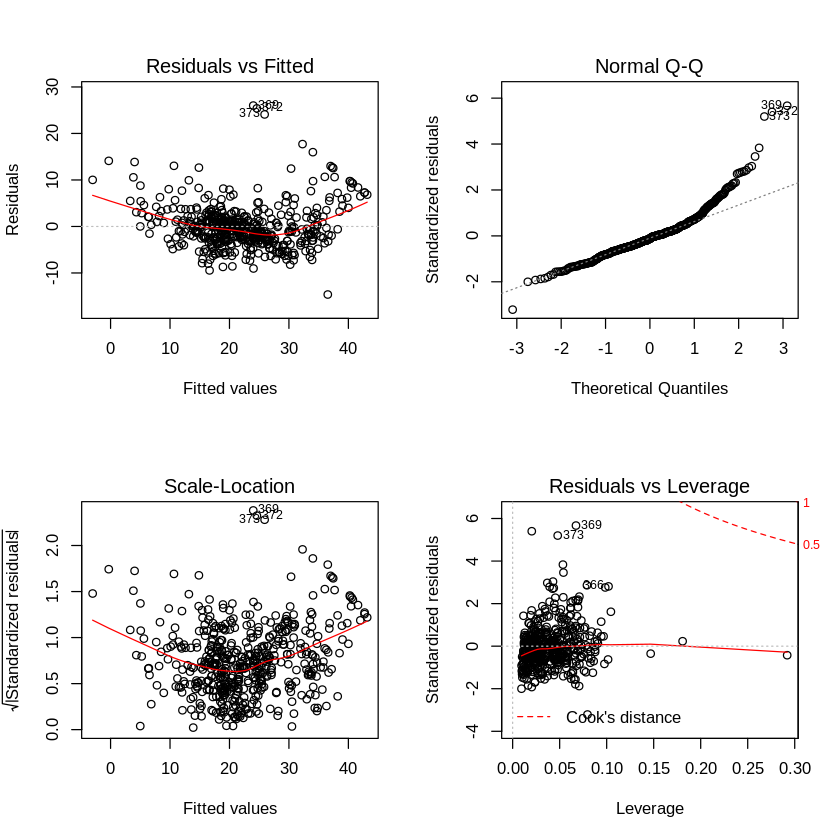

In [9]:
# Plot the model using default plots
par(mfrow=c(2,2))
plot(reg_model)

### Step 4: Make a prediction

Now that the regression model is fitted and the output is interpreted, it can be used to calculate a prediction.

Predict the median value of a house with the following variables: 

_**crim**_ = 3

_**zn**_ = 11

_**indus**_ = 11

_**chas**_ = 1

_**nox**_ = 0.5

_**rm**_ = 6

_**age**_ = 70

_**dis**_ = 3

_**rad**_ = 4

_**tax**_ = 300

_**ptratio**_ = 20

_**lstat**_ = 10

In [10]:
predData <- data.frame(crim = 3,
                       zn = 11, 
                       indus = 5,
                       chas=as.factor(1),
                      nox=0.5,
                      rm=6,
                      age=70,
                      dis=3,
                      rad=as.factor(4),
                      tax=300,
                      ptratio=20,
                      lstat=10)

predBalance <- predict(reg_model, predData)
predBalance

1 
25.86582

Copy your completed code cell above into the empty code cells below, and adjust the values of the different variables to identify the variables that have a significant impact on the property's value.

In [11]:
### Copy code into this cell to adjust variables
# lstat=5
predData <- data.frame(crim =3 , 
                       zn = 11, 
                       indus = 5,
                       chas=as.factor(1),
                      nox=0.5,
                      rm=6,
                      age=70,
                      dis=3,
                      rad=as.factor(4),
                      tax=300,
                      ptratio=20,
                      lstat=5)

predBalance <- predict(reg_model, predData)
predBalance

1 
28.6538

In [12]:
### Copy code into this cell to adjust variables
# rm=3.5
# lstat=5
predData <- data.frame(crim = 3, 
                       zn = 11, 
                       indus = 5,
                       chas=as.factor(1),
                      nox=0.5,
                      rm=3.5,
                      age=70,
                      dis=3,
                      rad=as.factor(4),
                      tax=300,
                      ptratio=20,
                      lstat=5)

predBalance <- predict(reg_model, predData)
predBalance

1 
19.87572

In [13]:
### Copy code into this cell to adjust variables
#rm=3.5
#lstat=5
#ptratio=15
predData <- data.frame(crim = 3, 
                       zn = 11, 
                       indus = 5,
                       chas=as.factor(1),
                      nox=0.5,
                      rm=3.5,
                      age=70,
                      dis=3,
                      rad=as.factor(4),
                      tax=300,
                      ptratio=15,
                      lstat=5)

predBalance <- predict(reg_model, predData)
predBalance

1 
24.67963

In [14]:
### Copy code into this cell to adjust variables
#rm=3.5
#lstat=5
#ptratio=15
#dis=10
predData <- data.frame(crim = 3, 
                       zn = 11, 
                       indus = 5,
                       chas=as.factor(1),
                      nox=0.5,
                      rm=3.5,
                      age=70,
                      dis=10,
                      rad=as.factor(4),
                      tax=300,
                      ptratio=15,
                      lstat=5)

predBalance <- predict(reg_model, predData)
predBalance

1 
13.69734

In [15]:
### Copy code into this cell to adjust variables
#rm=3.5
#lstat=5
#ptratio=15
#dis=10

#indus=20
#tax=400
#age=90
predData <- data.frame(crim = 3, 
                       zn = 11, 
                       indus = 20,
                       chas=as.factor(1),
                      nox=0.5,
                      rm=3.5,
                      age=90,
                      dis=10,
                      rad=as.factor(4),
                      tax=400,
                      ptratio=15,
                      lstat=5)

predBalance <- predict(reg_model, predData)
predBalance

1 
13.10842

**NOTE:** Remember to submit this IDE notebook after completion, and complete the written component of this assessment in the activity submission that follows.

In [16]:
#pval<-summary(reg_model)$coefficients[, c(0, 4)]
#sort(pval)
#plot(sort(pval))